AIRLINE CUSTOMER SATISFATION

In [1]:
#IMPORT NECESSARY PACKAGES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.shape

(103904, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
#remove unnecessary features:unnamed,id
df1=df.drop(columns=["id","Unnamed: 0"])
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#check and remove null values
df1.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
satisfaction                           0
Food and drink                         0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Gender                                 0
dtype: int64

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
#feature engineering:
df1['Total delay']=df1['Departure Delay in Minutes']+df1['Arrival Delay in Minutes']
df1['Total delay']

0         43.0
1          7.0
2          0.0
3         20.0
4          0.0
          ... 
103899     3.0
103900     0.0
103901    21.0
103902     0.0
103903     0.0
Name: Total delay, Length: 103594, dtype: float64

In [10]:
df2=df1.drop(columns=["Departure Delay in Minutes","Arrival Delay in Minutes"])
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0


<AxesSubplot:ylabel='satisfaction'>

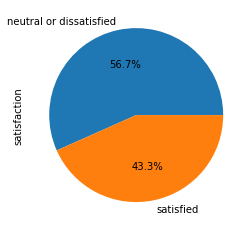

In [11]:
#data visualization
#univariate
#satisfaction
df2["satisfaction"].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='Customer Type'>

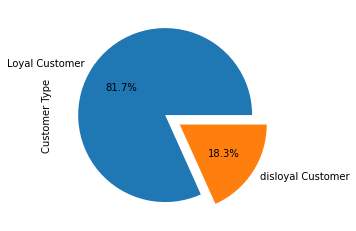

In [12]:
#customer type
df2["Customer Type"].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.2])

<AxesSubplot:ylabel='Type of Travel'>

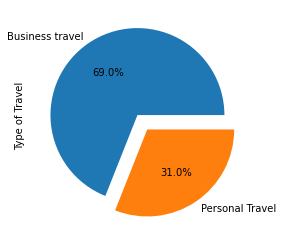

In [13]:
#type of travel
df2["Type of Travel"].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.2])

<AxesSubplot:ylabel='Class'>

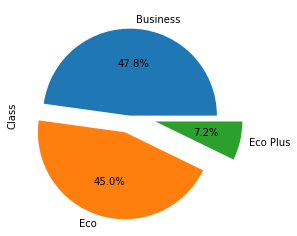

In [14]:
#class
df2["Class"].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0,0.2,0.3])

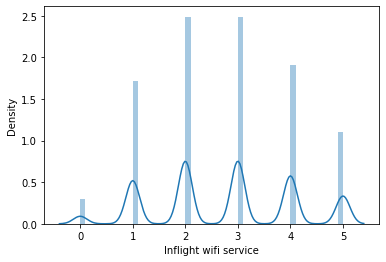

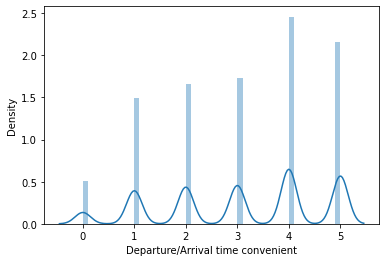

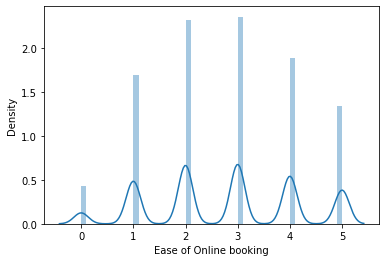

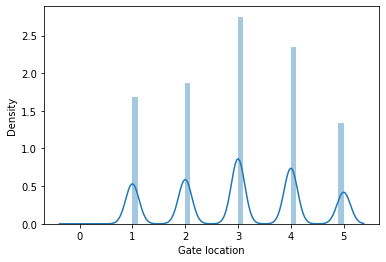

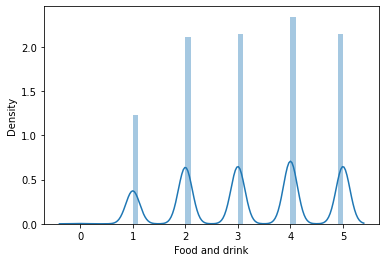

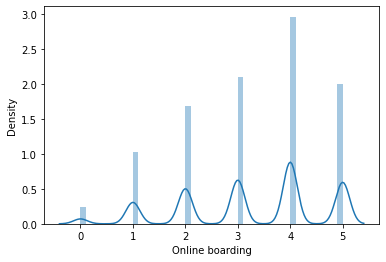

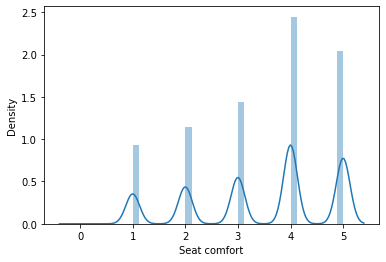

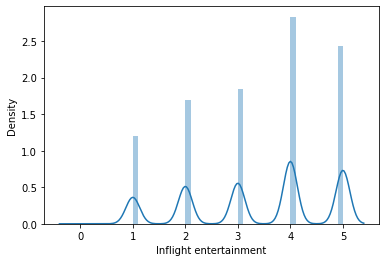

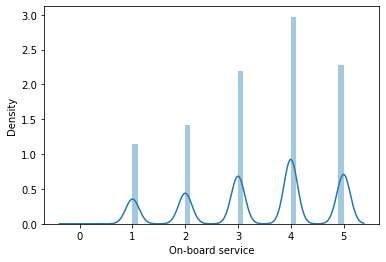

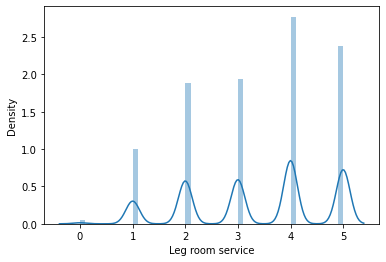

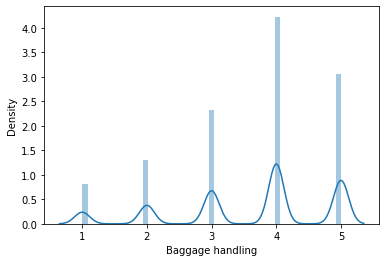

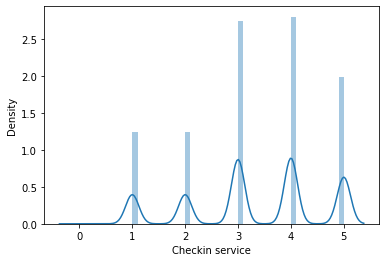

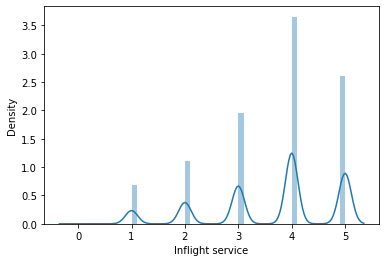

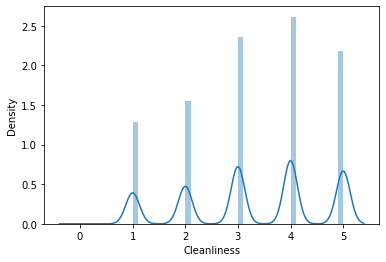

In [15]:
#rating frequencies of different features 
cols=['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in cols:
    sns.distplot(df2[i])
    plt.show()

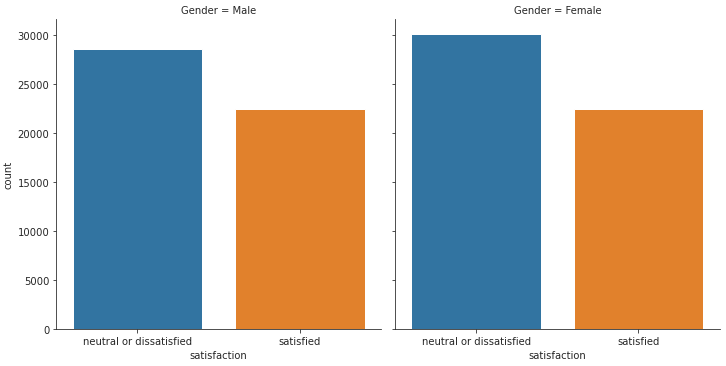

In [16]:
#bivariate 
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df2, kind="count") 

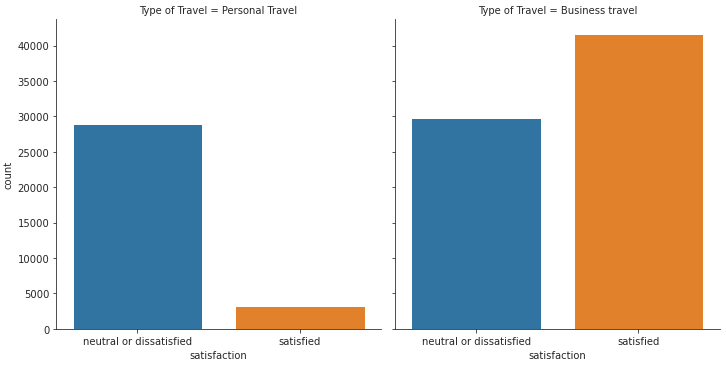

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Type of Travel", col_wrap=2, data=df2, kind="count") 

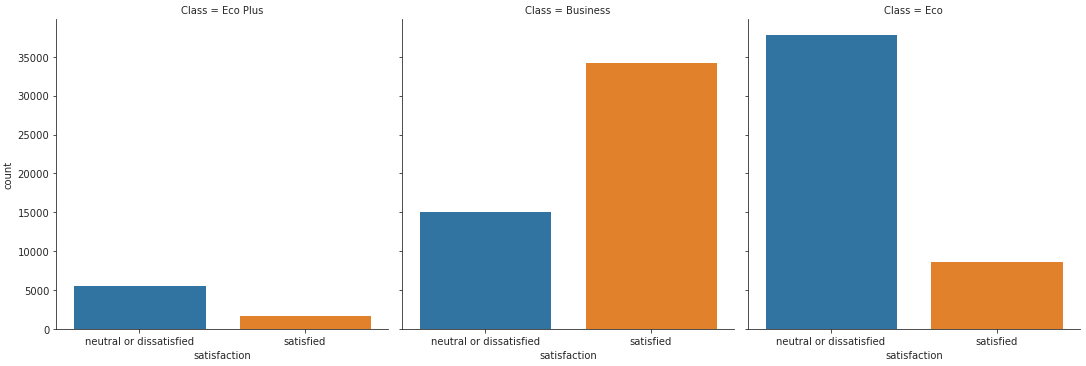

In [18]:
 with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Class", col_wrap=3, data=df2, kind="count") 

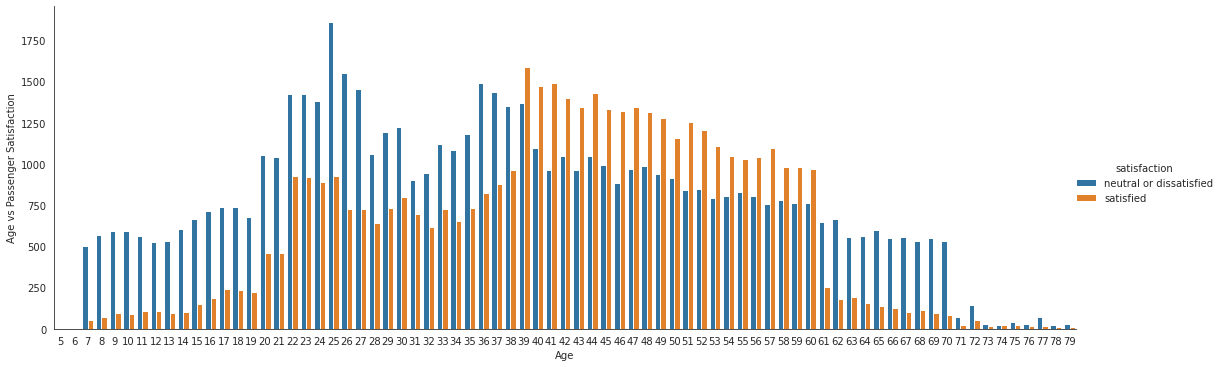

In [19]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df2, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [20]:
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total delay
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,neutral or dissatisfied,43.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,neutral or dissatisfied,7.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,satisfied,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,neutral or dissatisfied,20.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,satisfied,0.0


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

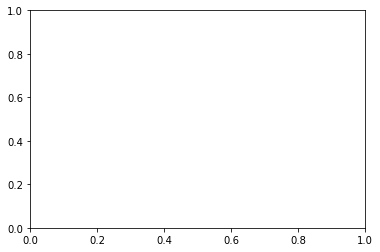

In [21]:
sns.violinplot(data=df2,x="Flight Distance",y="satisfaction")

In [23]:
#multivariate
df3=df2['satisfaction']
df3.replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
df4=df2.drop(columns=['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [24]:
df4.corrwith(df3).sort_values(ascending=False)

Online boarding                      0.503447
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Ease of Online booking               0.171507
Age                                  0.137040
Gate location                        0.000449
Departure/Arrival time convenient   -0.051718
Total delay                         -0.054548
dtype: float64

<AxesSubplot:>

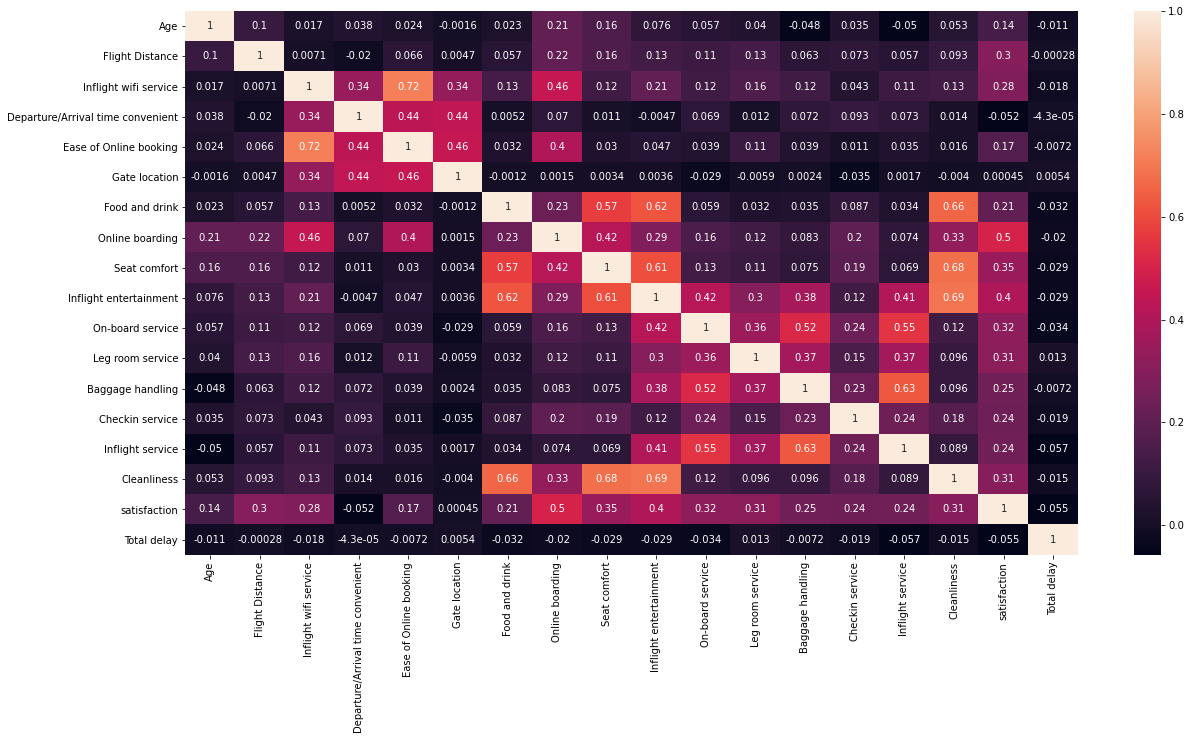

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True)

In [38]:
data1=pd.read_csv('train.csv')
data1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [39]:
data2=pd.read_csv('test.csv')
data2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [31]:
#shape of train and test data
print(data1.shape)
print(data2.shape)

(103904, 25)
(25976, 25)


In [33]:
#data info
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [35]:
#checking for null values
print(data1.isnull().sum().sort_values(ascending=False))
print(data2.isnull().sum().sort_values(ascending=False))

Arrival Delay in Minutes             310
satisfaction                           0
Gate location                          0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Unnamed: 0      

In [40]:
#remove unnecessary features:unnamed,id
data11=data1.drop(columns=["id","Unnamed: 0"])
data11.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [41]:
data12=data1.drop(columns=["id","Unnamed: 0"])
data12.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [45]:
data11.dropna(inplace=True)
data12.dropna(inplace=True)
print(data11)
print(data12)

        Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  11

In [47]:
print(data11.isnull().sum())
print(data12.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Gender                               0
Customer Type                        0
Age         

In [48]:
#feature engineering(train):
data11['Total delay']=data11['Departure Delay in Minutes']+data11['Arrival Delay in Minutes']
data11['Total delay']

0         43.0
1          7.0
2          0.0
3         20.0
4          0.0
          ... 
103899     3.0
103900     0.0
103901    21.0
103902     0.0
103903     0.0
Name: Total delay, Length: 103594, dtype: float64

In [50]:
#feature engineering(test):
data12['Total delay']=data12['Departure Delay in Minutes']+data12['Arrival Delay in Minutes']
data12['Total delay']

0         43.0
1          7.0
2          0.0
3         20.0
4          0.0
          ... 
103899     3.0
103900     0.0
103901    21.0
103902     0.0
103903     0.0
Name: Total delay, Length: 103594, dtype: float64

In [53]:
data11.shape

(103594, 24)

In [55]:
def age_binner(x):
    if x>=0 and x<=10:
        return 'Children'
    elif x>10 and x<=18:
        return 'Youth'
    elif x>18 and x<=60:
        return 'Adult'
    else:
        return 'Senior Citizen'

In [56]:
data11.Age = data11.Age.apply(age_binner)

In [57]:
data11.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total delay
0,Male,Loyal Customer,Youth,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,43.0
1,Male,disloyal Customer,Adult,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,7.0
2,Female,Loyal Customer,Adult,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0.0
3,Female,Loyal Customer,Adult,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,20.0
4,Male,Loyal Customer,Senior Citizen,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,0.0


In [58]:
data12.Age = data12.Age.apply(age_binner)

In [59]:
data12.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total delay
0,Male,Loyal Customer,Youth,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,43.0
1,Male,disloyal Customer,Adult,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,7.0
2,Female,Loyal Customer,Adult,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,0.0
3,Female,Loyal Customer,Adult,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,20.0
4,Male,Loyal Customer,Senior Citizen,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,0.0


In [60]:
#Encoding
#scaling
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [61]:
data11_encoded=pd.get_dummies(data11)
data12_encoded=pd.get_dummies(data12)

In [63]:
data11_encoded.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Age_Children,Age_Senior Citizen,Age_Youth,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,460,3,4,3,1,5,3,5,5,4,...,0,0,1,0,1,0,0,1,1,0
1,235,3,2,3,3,1,3,1,1,1,...,0,0,0,1,0,1,0,0,1,0
2,1142,2,2,2,2,5,5,5,5,4,...,0,0,0,1,0,1,0,0,0,1
3,562,2,5,5,5,2,2,2,2,2,...,0,0,0,1,0,1,0,0,1,0
4,214,3,3,3,3,4,5,5,3,3,...,0,1,0,1,0,1,0,0,0,1


In [64]:
data12_encoded.head()

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Age_Children,Age_Senior Citizen,Age_Youth,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,460,3,4,3,1,5,3,5,5,4,...,0,0,1,0,1,0,0,1,1,0
1,235,3,2,3,3,1,3,1,1,1,...,0,0,0,1,0,1,0,0,1,0
2,1142,2,2,2,2,5,5,5,5,4,...,0,0,0,1,0,1,0,0,0,1
3,562,2,5,5,5,2,2,2,2,2,...,0,0,0,1,0,1,0,0,1,0
4,214,3,3,3,3,4,5,5,3,3,...,0,1,0,1,0,1,0,0,0,1


In [65]:
y_data11=data11["satisfaction"]
y_data12=data12["satisfaction"]

In [67]:
le=LabelEncoder()
y_data11=le.fit_transform(y_data11)
y_data12=le.fit_transform(y_data12)

In [69]:
ss=StandardScaler()
data11_scaled=ss.fit_transform(data11_encoded)
data12_scaled=ss.fit_transform(data12_encoded)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV,StratifiedKFold,KFold
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [127]:
lr=LogisticRegression()
model=lr.fit(data11_scaled,y_data11)
model

LogisticRegression()

In [128]:
y_pred=model.predict(data12_scaled)

In [129]:
accuracy_score(y_data12,y_pred)

1.0

In [91]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(solver='liblinear')

In [92]:
logreg.fit(data11_scaled,y_data11) 

LogisticRegression(solver='liblinear')

In [86]:
y_pred=logreg.predict(data12_scaled)

In [93]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [94]:
cm=confusion_matrix(y_pred,y_data12)
cm

array([[58697,     0],
       [    0, 44897]], dtype=int64)

In [95]:
from sklearn.metrics import classification_report

In [96]:
# calculate various performance measures
acc_table = classification_report(y_data12, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58697
           1       1.00      1.00      1.00     44897

    accuracy                           1.00    103594
   macro avg       1.00      1.00      1.00    103594
weighted avg       1.00      1.00      1.00    103594



In [110]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [117]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(data11_scaled, y_data11)

In [118]:
decision_tree

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [119]:
y_pred_prob=decision_tree.predict(data12_scaled)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [120]:
cm=confusion_matrix(y_pred,y_pred_prob)
cm

array([[58697,     0],
       [    0, 44897]], dtype=int64)

In [122]:
acc_table = classification_report(y_data12, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58697
           1       1.00      1.00      1.00     44897

    accuracy                           1.00    103594
   macro avg       1.00      1.00      1.00    103594
weighted avg       1.00      1.00      1.00    103594



In [123]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
decision_tree = dt_model.fit(data11_scaled, y_data11)

In [124]:
y_pred_prob=decision_tree.predict(data12_scaled)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [125]:
cm=confusion_matrix(y_pred,y_data12)
cm

array([[58697,     0],
       [    0, 44897]], dtype=int64)

In [126]:
acc_table = classification_report(y_data12, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58697
           1       1.00      1.00      1.00     44897

    accuracy                           1.00    103594
   macro avg       1.00      1.00      1.00    103594
weighted avg       1.00      1.00      1.00    103594



In [134]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(data11_scaled, y_data11)

In [135]:
y_pred_prob=gnb_model.predict(data12_scaled)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [136]:
acc_table = classification_report(y_pred,y_pred_prob)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58697
           1       1.00      1.00      1.00     44897

    accuracy                           1.00    103594
   macro avg       1.00      1.00      1.00    103594
weighted avg       1.00      1.00      1.00    103594



In [137]:
gnb = GaussianNB()
model_gb=gnb.fit(data11_scaled,y_data11)
y_pred=model_gb.predict(data12_scaled)
accuracy_score(y_data12,y_pred)

1.0

In [138]:
gnb = GaussianNB()
model_gb=gnb.fit(data11_encoded,y_data11)
y_pred=model_gb.predict(data12_encoded)
accuracy_score(y_data12,y_pred)

1.0